In [364]:
#Import modules
#data analysis & wrangling
import numpy as np
import pandas as pd
import random as rnd

#visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [365]:
# 1. Importing data

train_df = pd.read_csv("../DAY4/train.csv")
test_df = pd.read_csv("../DAY4/test.csv")
df = pd.concat([train_df, test_df])




In [366]:
# 2. DataEDA
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [367]:
#This dataset shows the passengers information that embarked on the Titanic ship, 
# the Embarked location is marked by C = Cherbourg, Q = Queenstown, S = Southampton 

In [368]:
#Information and Describe the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [369]:
df['Ticket'].value_counts() # Too little information provided from tickets, has too many categories

Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: count, Length: 929, dtype: int64

In [370]:
df['Cabin'].value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64

In [371]:
df['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [372]:
df['Sex'].value_counts()

Sex
male      843
female    466
Name: count, dtype: int64

In [373]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


Percentage of PClass = 1 who survived 62.96
Percentage of PClass = 2 who survived 47.28
Percentage of PClass = 3 who survived 24.24


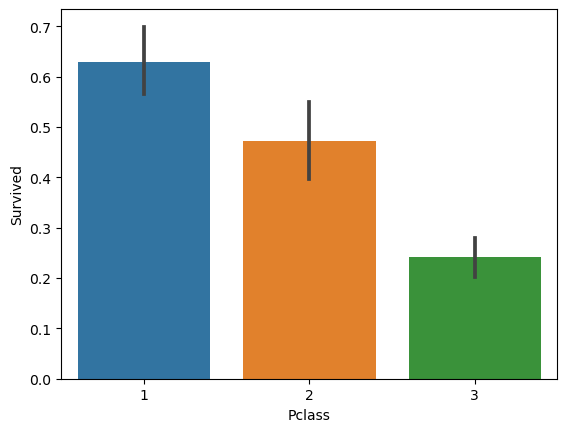

In [374]:
#Visualise the relationship of Percentage of PClass with Survived 
sns.barplot(x="Pclass", y="Survived", data= train_df)
survived_1 = train_df["Survived"][train_df["Pclass"]==1].value_counts(normalize=True)[1]
survived_2 = train_df["Survived"][train_df["Pclass"]==2].value_counts(normalize=True)[1]
survived_3 = train_df["Survived"][train_df["Pclass"]==3].value_counts(normalize=True)[1]

print("Percentage of PClass = 1 who survived", round(survived_1*100,2))
print("Percentage of PClass = 2 who survived", round(survived_2*100,2))
print("Percentage of PClass = 3 who survived", round(survived_3*100,2))



In [375]:
train_df["Age"].isnull().sum()
#Fill with -0.5 for unknown ages
train_df["Age"] = train_df["Age"].fillna(-0.5)

In [376]:
train_df["Age"].isnull().sum()

0

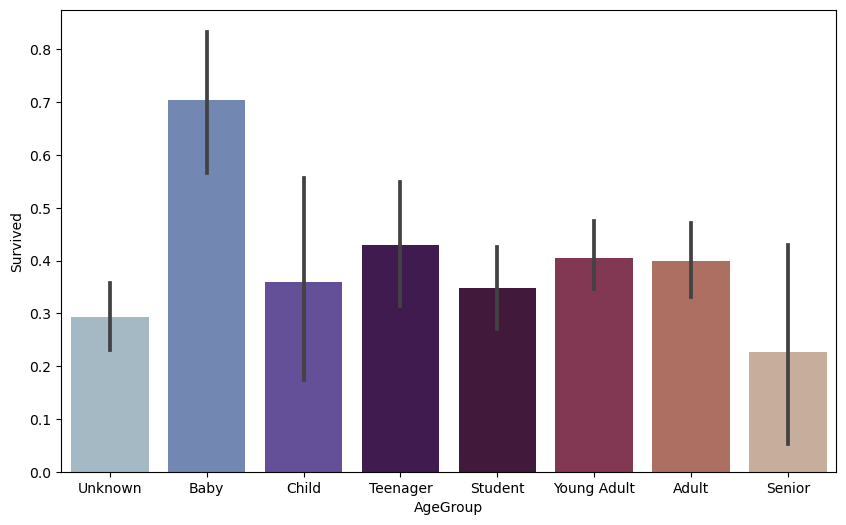

In [377]:
import warnings
warnings.filterwarnings('ignore')

#Visualise the relationship of Percentage of Ages with Survived 
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf] #9
labels =["Unknown","Baby","Child","Teenager","Student","Young Adult","Adult","Senior"]#bins-1
df["AgeGroup"] = pd.cut(train_df["Age"], bins=bins, labels=labels)

#draw a bar plot Age vs Survival
plt.figure(figsize=(10,6))
sns.barplot(x="AgeGroup",y="Survived", data=df, palette="twilight")
plt.show()


In [378]:
# 3. Data Preprocessing

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [379]:
#Look for null values

test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [380]:
#we'll start off by dropping the Cabin feature since not a lot of useful information provided
#the cabin feature is missing 687/891 = 77.1% of its values.
#since somuch of the feature is missing, it would be hard to fill in the missing values,
#The approach for this is to drop the Cabin feature column

train_df = train_df.drop(['Cabin'],axis=1)
test_df = test_df.drop(['Cabin'],axis=1)

In [381]:
# check if column is drop
print(train_df.head(1))#no Cabin column anymore
print("_"*50)
print(test_df.head(1)) #no Cabin column anymore

   PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Embarked  
0      0  A/5 21171  7.25        S  
__________________________________________________
   PassengerId  Pclass              Name   Sex   Age  SibSp  Parch  Ticket  \
0          892       3  Kelly, Mr. James  male  34.5      0      0  330911   

     Fare Embarked  
0  7.8292        Q  


In [382]:
#we will drop the Ticket feature since not a lot useful information can be extracted from it


train_df = train_df.drop(['Ticket'],axis=1)
test_df = test_df.drop(['Ticket'],axis=1)

In [383]:
# check if column is drop
print(train_df.head(1))#no Ticket column anymore
print("_"*100)
print(test_df.head(1)) #no Ticket column anymore

   PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch  Fare Embarked  
0      0  7.25        S  
____________________________________________________________________________________________________
   PassengerId  Pclass              Name   Sex   Age  SibSp  Parch    Fare  \
0          892       3  Kelly, Mr. James  male  34.5      0      0  7.8292   

  Embarked  
0        Q  


In [384]:
#Drop Pasengger ID and Name
train_df = train_df.drop(['PassengerId',"Name",],axis=1)
test_df = test_df.drop(['PassengerId',"Name"],axis=1)


In [385]:
#check if column is drop
print(train_df.head(1))#no Pasengger ID and Name column anymore
print("_"*100)
print(test_df.head(1)) #no Pasengger ID and Name column anymore

   Survived  Pclass   Sex   Age  SibSp  Parch  Fare Embarked
0         0       3  male  22.0      1      0  7.25        S
____________________________________________________________________________________________________
   Pclass   Sex   Age  SibSp  Parch    Fare Embarked
0       3  male  34.5      0      0  7.8292        Q


In [386]:
train_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [387]:
#Change object/string data to numerical values

#Male and female -> Change to numerical value

#1st method
#train_df['Sex']=train_df['Sex'].replace(['male','female'],[0,1])
#train_df['Sex'].value_counts()

In [388]:
#map each sex calue to a numerical value
#2nd method
s_map = {"male":0 , "female":1}
train_df["Sex"]= train_df['Sex'].map(s_map)
test_df["Sex"]= test_df['Sex'].map(s_map)


In [389]:
train_df['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [390]:
test_df['Sex'].value_counts()

Sex
0    266
1    152
Name: count, dtype: int64

In [391]:
#Embarked map 'S', 'C', 'Q' into 1, 2, 3 value respectively

e_map = {"S":1, "C":2, "Q":3}
train_df["Embarked"] = train_df["Embarked"].map(e_map)
test_df["Embarked"] = test_df["Embarked"].map(e_map)
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1.0
1,1,1,1,38.0,1,0,71.2833,2.0
2,1,3,1,26.0,0,0,7.9250,1.0
3,1,1,1,35.0,1,0,53.1000,1.0
4,0,3,0,35.0,0,0,8.0500,1.0


In [392]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,889.000000
mean,0.383838,2.308642,0.352413,23.699966,0.523008,0.381594,32.204208,1.362205
std,0.486592,0.836071,0.477990,17.731181,1.102743,0.806057,49.693429,0.636157
min,0.000000,1.000000,0.000000,-0.500000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,0.000000,24.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [393]:
train_df['Embarked'].value_counts()

Embarked
1.0    644
2.0    168
3.0     77
Name: count, dtype: int64

In [394]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [395]:
#It's clear that the majority of people embarked in Southampton(S).
#Let's replace the missing values in the Embarked feature with 1
train_df = train_df.fillna({"Embarked":1})

In [396]:
#There is no more null values in train set
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [397]:
test_df['Age']= test_df["Age"].fillna(-0.5) 
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [398]:
test_df["Pclass"].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

In [399]:
#1. Find out the P class of the missing fare value
#2. Find out the mean of the fare from the selected Pclass 
#3. Fill in the mean value into the missing fare value

for x in range(len(test_df['Fare'])):
    if pd.isnull(test_df["Fare"][x]): #If the fare is null go to the next step
        pclass = test_df["Pclass"][x] #Find out the Pclass - Step1
        mean_fare = train_df[train_df["Pclass"]==pclass]["Fare"].mean() #Step2
        test_df["Fare"][x] = round(mean_fare,4)  #Step3
        print(x)
        print(test_df["Fare"][x])



152
13.6756


In [400]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [401]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1.0
1,1,1,1,38.0,1,0,71.2833,2.0
2,1,3,1,26.0,0,0,7.9250,1.0
3,1,1,1,35.0,1,0,53.1000,1.0
4,0,3,0,35.0,0,0,8.0500,1.0


In [402]:
# 4. Data SPlitting
#features
X = train_df.drop('Survived', axis=1)
#target
Y = train_df["Survived"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=64)

<Axes: >

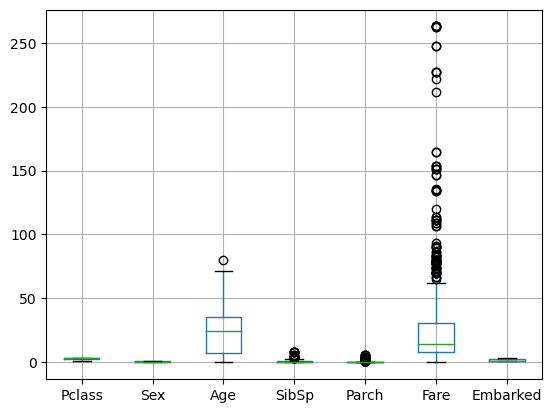

In [403]:
# 5. Feature scaling
x_train.head()
x_train.boxplot() 

In [404]:
colname = x_train.columns #save the column name into colname

In [405]:
#Use standard scaler to transform data
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

#Transform "train_x"
x_train = SS.fit_transform(x_train)

#transform "test_x"
x_test = SS.fit_transform(x_test)

In [406]:
x_train = pd.DataFrame(x_train,columns=colname)
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-0.372487,-0.717561,1.678952,0.497719,-0.453044,-0.099676,-0.571227
1,-0.372487,-0.717561,0.002087,-0.465259,-0.453044,-0.474464,-0.571227
2,0.827563,-0.717561,0.449251,0.497719,-0.453044,-0.345101,-0.571227
3,-1.572538,-0.717561,2.237907,0.497719,4.856703,5.630952,-0.571227
4,0.827563,-0.717561,1.287684,-0.465259,-0.453044,-0.510734,-0.571227


In [408]:
# 6. Model Development - Decision Tree Classifier

DT = DecisionTreeClassifier(criterion="entropy", random_state= 0)
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)

The accuracy for DT model is:  78.2122905027933


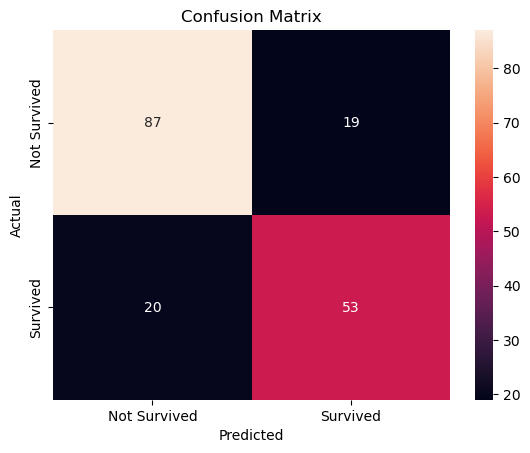

              precision    recall  f1-score   support

Not Survived       0.81      0.82      0.82       106
    Survived       0.74      0.73      0.73        73

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [411]:
# 7. Model Evaluation
from sklearn.metrics import accuracy_score
acc_dt = accuracy_score(y_pred, y_test)*100
print("The accuracy for DT model is: ", acc_dt)

cm =confusion_matrix(y_test,y_pred)
#Create a heatmap 
ax = sns.heatmap(cm, annot=True, fmt="d") 
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
ax.set_xticklabels(['Not Survived',"Survived"])
ax.set_yticklabels(['Not Survived',"Survived"])
plt.show()
print(classification_report(y_test, y_pred, target_names=['Not Survived',"Survived"]))

The accuracy for RF model is:  80.44692737430168
              precision    recall  f1-score   support

Not Survived       0.82      0.86      0.84       106
    Survived       0.78      0.73      0.75        73

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



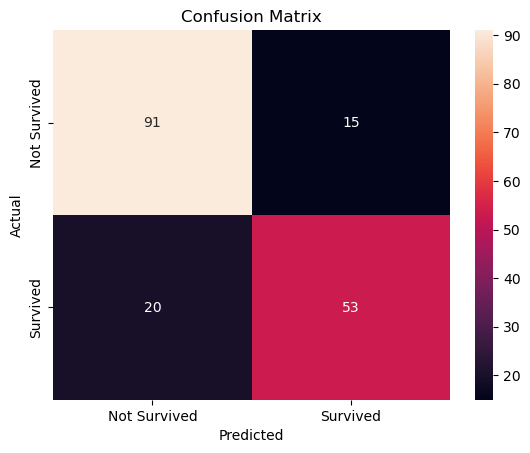

In [414]:
#model Development - Random Forest

RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)

acc_RF = accuracy_score(y_pred, y_test)*100
print("The accuracy for RF model is: ", acc_RF)

cm =confusion_matrix(y_test,y_pred)
#Create a heatmap 
ax = sns.heatmap(cm, annot=True, fmt="d") 
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

ax.set_xticklabels(['Not Survived',"Survived"])
ax.set_yticklabels(['Not Survived',"Survived"])
print(classification_report(y_test, y_pred, target_names=['Not Survived',"Survived"]))

In [419]:
# Continue this code right before train-test split
# Import the KFold class
from sklearn.model_selection import KFold
kfcv = KFold(n_splits=5,shuffle=True,random_state=42)

accuracy_list = []
for (k,(train,test)) in enumerate(kfcv.split(X,Y)):
    # Feature scaling
    standard_scaler = StandardScaler()
    x_train_split = X.iloc[train]
    x_train_split = standard_scaler.fit_transform(x_train_split)
    x_test_split = standard_scaler.transform(X.iloc[test])
    # Model training
    model = DecisionTreeClassifier(criterion="entropy", random_state=42)
    model.fit(x_train_split,Y.iloc[train])
    # Model evaluation
    print('Split number #',k+1)
    predictions = model.predict(x_test_split)
    print('Confusion matrix:\n',confusion_matrix(Y.iloc[test],predictions))
    print('Classification report:\n',classification_report(Y.iloc[test],predictions))
    accuracy_list.append(accuracy_score(Y.iloc[test],predictions))
    

Split number # 1
Confusion matrix:
 [[84 21]
 [16 58]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       105
           1       0.73      0.78      0.76        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.79      0.79       179

Split number # 2
Confusion matrix:
 [[91 20]
 [23 44]]
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       111
           1       0.69      0.66      0.67        67

    accuracy                           0.76       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.76      0.76      0.76       178

Split number # 3
Confusion matrix:
 [[88 20]
 [16 54]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       108


In [420]:
# Find the average accuracy
accuracy_np = np.array(accuracy_list)
print(accuracy_np.mean())

0.7833783190006904


In [421]:
# Model saving/loading
import pickle as pkl

# Save model
with open('dt_model.pkl','wb') as f:
    pkl.dump(model,f)

In [422]:
# Load model
with open('dt_model.pkl','rb') as f:
    saved_model = pkl.load(f)
type(saved_model)

sklearn.tree._classes.DecisionTreeClassifier

In [423]:
new_prediction = saved_model.predict(x_test_split)
print(new_prediction)

[1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0
 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1
 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1]
